**Turbina hidroelectrica**

*Por: Alejandro Garces*

Pereira, febrero 17 de 2026

In [64]:
using LinearAlgebra
using Plots
using ControlSystems
theme(:dark)

Modelo de una turbina hidroelectrica

$\frac{1-sT_w}{1+sT_w/2}$

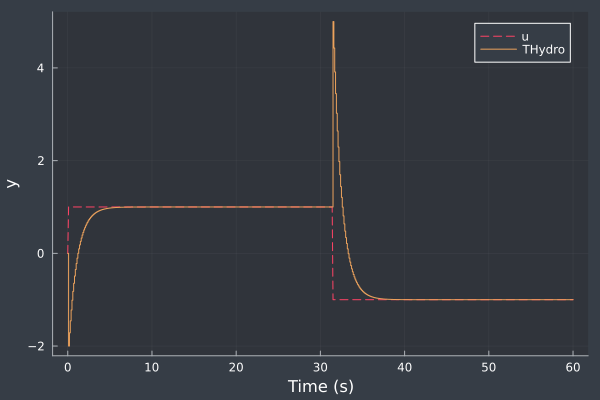

In [61]:
Tw = 2        # constante de tiempo de la turbina
GT = tf([-Tw,1],[0.5*Tw,1]) # Turbina

t = 0:0.1:60
u = sign.(sin.(0.1*t))
res1 = lsim(GT,u',t)
plot(t,u,label="u",linestyle = :dash)
plot!(res1,label="THydro")  # Notar que el sistema es de fase no minima

Gobernador con transient droop

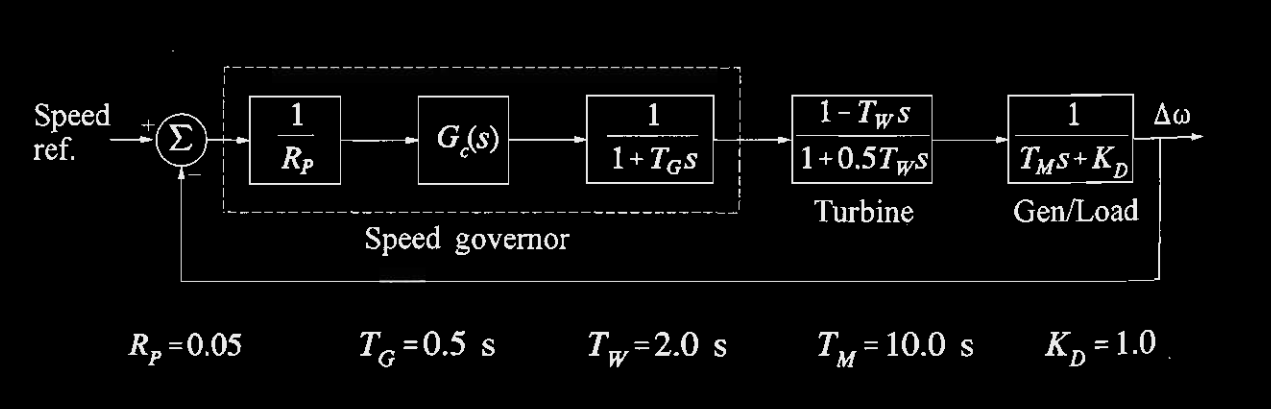

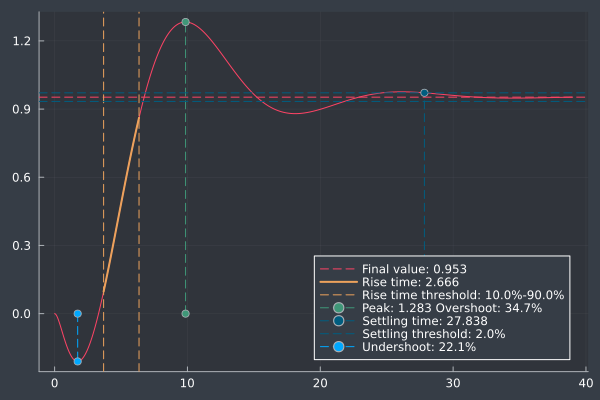

In [63]:
# Parametros de la maquina, turbina y gobernador
w0 = 2*pi*60  # frecuencia nominal
Ta = 10       # constante de tiempo maquina 
Tw = 2        # constante de tiempo de la turbina
kD = 1        # damping       
Tg = 0.5      # constante de tiempo del gobernador  
Tr = 9        # constante de tiempo del droop transitorio
Rt = 0.43     # Droop temporal
Rp = 0.05     # Droop\

GM = tf([1],[Ta,kD]) # Maquina (modelo simplificado)
GT = tf([-Tw,1],[0.5*Tw,1]) # Turbina
G1 = tf([1],[Tg,1])  # Gobernador
GC = tf([Tr,1],[Tr*Rt/Rp,1]) # Transient droop
GH = 1/Rp*GC*G1*GT*GM 
HR = GH/(1+GH)
res = step(HR)
plot(stepinfo(res))

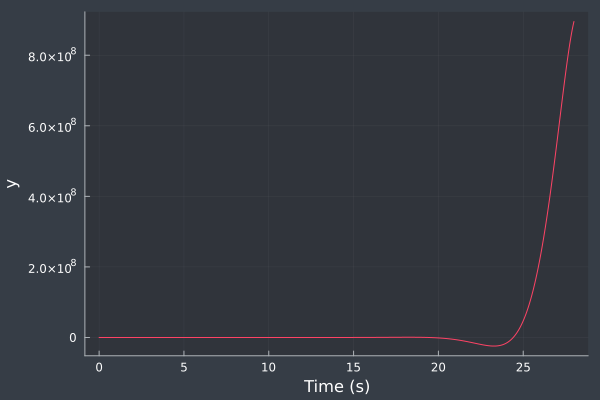

In [54]:
# Sin transient droop
GH2 = 1/Rp*G1*GT*GM 
HR2 = GH2/(1+GH2)
res2 = step(HR2)
plot(res2)

Gobernador PID

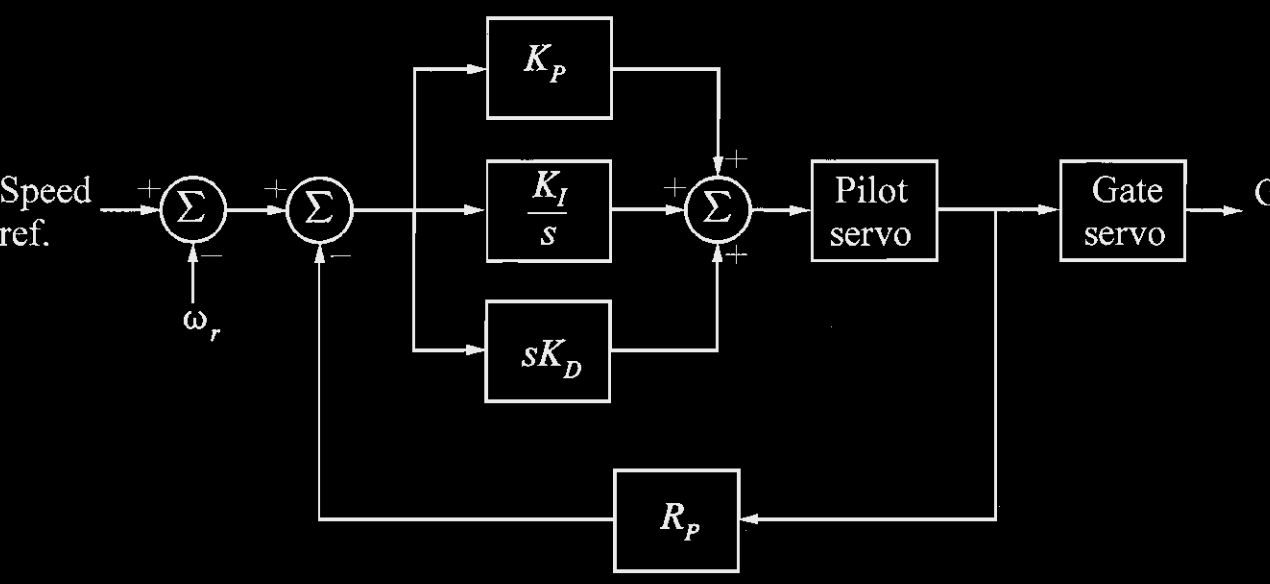

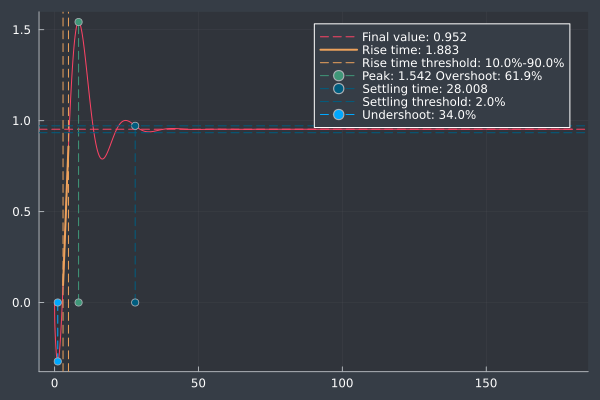

In [59]:
# Gobernador PID
kp = 3.0 # proporcional
ki = 0.7 # integral
kd = 0.5 # derivativo
Gp = tf([kd,kp,ki],[1,0])
G3 = Gp/(1+Rp*Gp)
GH3 = G3*GT*GM 
HR3 = GH3/(1+GH3)
res = step(HR3)
plot(stepinfo(res))